In [1]:
MAX_DEPTH = 2
MIN_SAMPLES = 500

In [2]:
import pandas as pd
import json

with open('first_data_24.json', 'r', encoding='UTF-8') as f:
    first_data = json.load(f)

NEW_COL = ['name', 'code', 'time', 'price', 'time_1', 'price_1', 'price_dif_1',
       'sell_1', 'buy_1', 'volume_1', 'variation_1', 'post_num_1',
       'unique_id_1', 'click_1', 'like_1', 'dislike_1', 'time_2', 'price_2',
       'price_dif_2', 'sell_2', 'buy_2', 'volume_2', 'variation_2',
       'post_num_2', 'unique_id_2', 'click_2', 'like_2', 'dislike_2', 'time_3',
       'price_3', 'price_dif_3', 'sell_3', 'buy_3', 'volume_3', 'variation_3',
       'post_num_3', 'unique_id_3', 'click_3', 'like_3', 'dislike_3',
       'mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend', 'price_increase', 'did_price_increase']
df = pd.DataFrame(first_data, columns = NEW_COL)

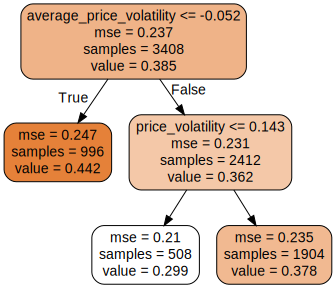

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

y = df['did_price_increase'].values
X = df[['mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend']].values

df_tree = DecisionTreeRegressor(max_depth=MAX_DEPTH, min_samples_leaf=MIN_SAMPLES)
df_tree.fit(X, y)

from sklearn.tree import export_graphviz
import graphviz

df_tree_viz = export_graphviz(
    df_tree,
    out_file=None,
    feature_names=['mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend'],
    rounded=True,
    filled=True,
)

graph = graphviz.Source(df_tree_viz)
#graph.render('df_tree_viz')
graph

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


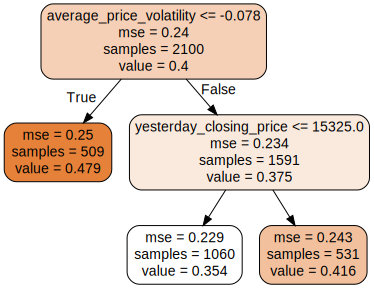

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

X_train = df[['mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend']][:2100].as_matrix()

y_train = df[["did_price_increase"]][:2100].as_matrix()

X_test = df[['mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend']][2100:].as_matrix()

y_test = df[["did_price_increase"]][2100:].as_matrix()

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

df_tree2 = DecisionTreeRegressor(max_depth=MAX_DEPTH, min_samples_leaf=MIN_SAMPLES)
df_tree2.fit(X_train, y_train)

df_tree_viz2 = export_graphviz(
    df_tree2,
    out_file=None,
    feature_names=['mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price',
       'is_maximum', 'is_minimum', 'price_volatility', 'price_trend',
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2',
       'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility',
       'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend',
       'click_trend'],
    rounded=True,
    filled=True,
)

graph = graphviz.Source(df_tree_viz2)
#graph.render('df_tree_viz2')
graph

In [5]:
import math

y_pred = df_tree2.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)
print("prediction:", 1 - math.sqrt(MSE))

MSE: 0.232748227586
prediction: 0.5175601306006148
